# Introducing Keras

Keras is a higher-level API within TensorFlow that makes things a lot easier. 

Set up the same deep neural network we set up with TensorFlow to learn from the MNIST data set.

Import all that is needed, which will initialize Keras as a side effect:

In [1]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop

Load up the MNIST data set. There are 60K training samples and 10K test samples.

In [2]:
(mnist_train_images, mnist_train_labels), (mnist_test_images, mnist_test_labels) = mnist.load_data()

Explicitly convert the data into the format Keras / TensorFlow expects. So divide the image data by 255 in order to normalize it into 0-1 range, after converting it into floating point values.

In [3]:
# reshape training images
train_images = mnist_train_images.reshape(60000, 784)

# reshape test images
test_images = mnist_test_images.reshape(10000, 784)

# cast images to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# normalize by 255
train_images /= 255
test_images /= 255

Convert the 0-9 labels into "one-hot" format. One_hot as a binary representation of the label data is which number each handwriting sample was intended to represent. Mathematically one_hot represents a dimension for every possible label value. Every dimension is set to the value 0, except for the "correct" one which is set to 1. 

For example, the label vector representing the number 1 would be [0, 1, 0, 0, 0, 0, 0, 0, 0, 0]

So the training label data is a tensor of shape [60,000, 10] - 60,000 test images each associated with 10 binary values that indicate whether or not the image represents a given number from 0-9.

In [4]:
# convert to one hot format for training and test data
train_labels = keras.utils.to_categorical(mnist_train_labels, 10)
test_labels = keras.utils.to_categorical(mnist_test_labels, 10)

Look at one of the training images just to make sure it looks OK:

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


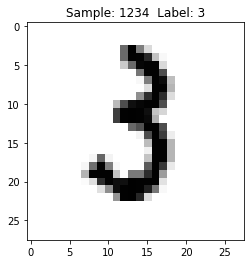

In [5]:
import matplotlib.pyplot as plt

def display_sample(num):
    #Print the one-hot array of this sample's label 
    print(train_labels[num])  
    
    #Print the label converted back to a number
    label = train_labels[num].argmax(axis=0)
    
    #Reshape the 768 values to a 28x28 image
    image = train_images[num].reshape([28,28])
    
    plt.title('Sample: %d  Label: %d' % (num, label))
    plt.imshow(image, cmap=plt.get_cmap('gray_r'))
    plt.show()
    
display_sample(1234)

Can set up the same layers like this. The input layer of 784 features feeds into a ReLU layer of 512 nodes, which then goes into 10 nodes with softmax applied. 

In [6]:
# setting up sequential model (add individual layers sequentially)
model = Sequential()

# add dense layers of 512 neurons
model.add(Dense(512, activation='relu', input_shape=(784,)))

# add final layer of 10
model.add(Dense(10, activation='softmax'))

Description of the resulting model:

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


Setting up optimizer and loss function : use the RMSProp optimizer.

In [8]:
# get optimization function set up
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

Training our model : do 10 epochs with a batch size of 100. Keras is slower.

In [9]:
# fit model using training dataset usiong batch sizes of 100, run 10 times
history = model.fit(train_images, train_labels,
                    batch_size=100,
                    epochs=10,
                    verbose=2,
                    validation_data=(test_images, test_labels))

Epoch 1/10
600/600 - 7s - loss: 0.2399 - accuracy: 0.9301 - val_loss: 0.1231 - val_accuracy: 0.9646
Epoch 2/10
600/600 - 8s - loss: 0.0977 - accuracy: 0.9709 - val_loss: 0.0982 - val_accuracy: 0.9698
Epoch 3/10
600/600 - 8s - loss: 0.0653 - accuracy: 0.9799 - val_loss: 0.0816 - val_accuracy: 0.9737
Epoch 4/10
600/600 - 8s - loss: 0.0471 - accuracy: 0.9859 - val_loss: 0.0685 - val_accuracy: 0.9805
Epoch 5/10
600/600 - 7s - loss: 0.0357 - accuracy: 0.9894 - val_loss: 0.0696 - val_accuracy: 0.9787
Epoch 6/10
600/600 - 7s - loss: 0.0273 - accuracy: 0.9922 - val_loss: 0.0798 - val_accuracy: 0.9778
Epoch 7/10
600/600 - 8s - loss: 0.0203 - accuracy: 0.9937 - val_loss: 0.0670 - val_accuracy: 0.9811
Epoch 8/10
600/600 - 9s - loss: 0.0165 - accuracy: 0.9951 - val_loss: 0.0672 - val_accuracy: 0.9825
Epoch 9/10
600/600 - 8s - loss: 0.0123 - accuracy: 0.9964 - val_loss: 0.0708 - val_accuracy: 0.9819
Epoch 10/10
600/600 - 6s - loss: 0.0099 - accuracy: 0.9972 - val_loss: 0.0743 - val_accuracy: 0.9821

Even with just 10 epochs, outperformed our Tensorflow version

In [10]:
# calculate score
score = model.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07432063668966293
Test accuracy: 0.9821000099182129


Visualize where it went wrong. As this model is much better, have to search deeper to find mistakes to look at.

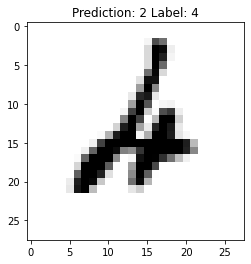

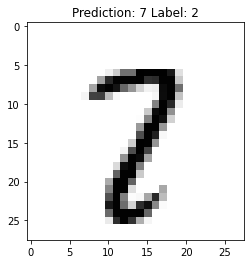

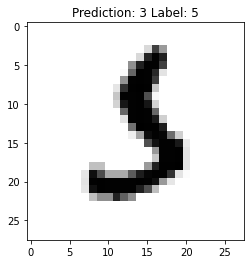

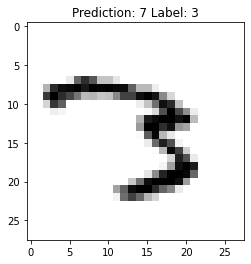

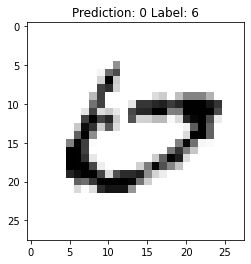

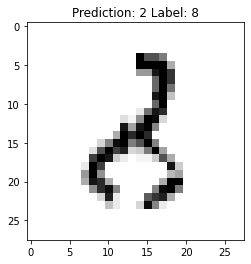

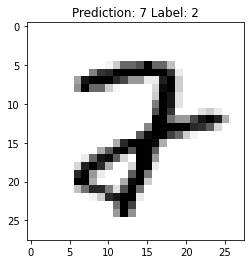

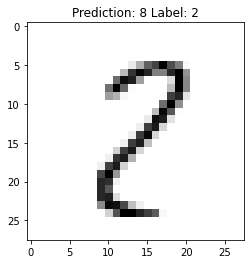

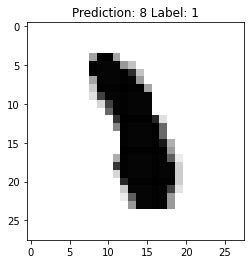

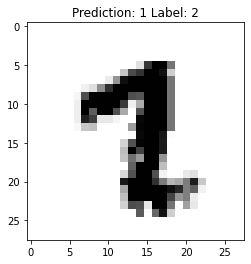

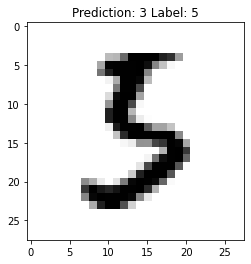

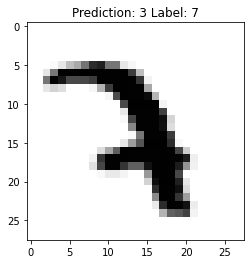

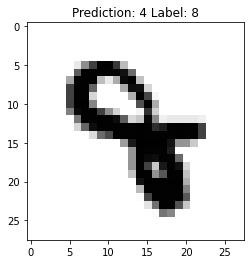

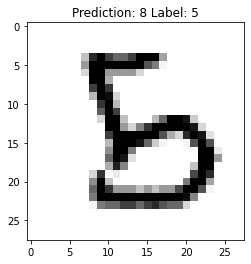

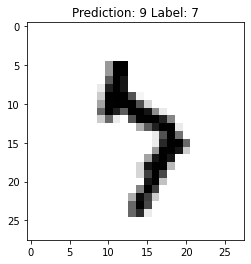

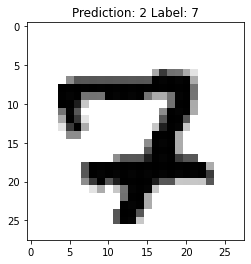

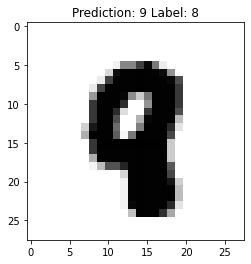

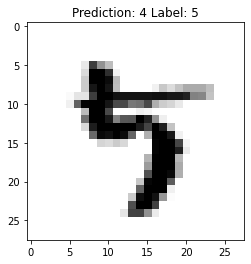

In [11]:
for x in range(1000):
    
    # reshape each image to flat array
    test_image = test_images[x,:].reshape(1,784)
    
    # resulting classification
    predicted_cat = model.predict(test_image).argmax()
    label = test_labels[x].argmax()
    
    # does rpedicted class match label
    if (predicted_cat != label):
        plt.title('Prediction: %d Label: %d' % (predicted_cat, label))
        plt.imshow(test_image.reshape([28,28]), cmap=plt.get_cmap('gray_r'))
        plt.show()